# Análise de Resultados - Experimento RCBD

Comparação de métodos de otimização de hiperparâmetros para SVM

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')

df = pd.read_csv('../results/experimento_rcbd_resultados.csv')
df.head(10)

,dataset,seed,metodo,acuracia,precisao,recall,f1_score,tempo,best_params
0,Breast Cancer,1,GridSearch,0.973684,0.975610,0.952381,0.963855,0.396202,"{'C': np.float64(21.544346900318846), 'gamma':..."
1,Breast Cancer,1,RandomSearch,0.973684,0.975610,0.952381,0.963855,0.250029,"{'C': 145.28246637516034, 'gamma': 0.001152644..."
2,Breast Cancer,1,BayesianOptimization,0.973684,0.975610,0.952381,0.963855,1.790803,"{'C': 96.09812947036423, 'gamma': 0.0008263688..."
3,Titanic,1,GridSearch,0.854749,0.905660,0.695652,0.786885,0.868064,"{'C': np.float64(1000.0), 'gamma': np.float64(..."
4,Titanic,1,RandomSearch,0.832402,0.809524,0.739130,0.772727,0.428746,"{'C': 45.70563099801451, 'gamma': 0.0984673887..."
5,Titanic,1,BayesianOptimization,0.826816,0.796875,0.739130,0.766917,2.381676,"{'C': 79.15074397656232, 'gamma': 0.0964385761..."
6,Water Potability,1,GridSearch,0.690549,0.819277,0.265625,0.401180,8.321138,"{'C': np.float64(1000.0), 'gamma': np.float64(..."
7,Water Potability,1,RandomSearch,0.690549,0.624413,0.519531,0.567164,6.188711,"{'C': 45.70563099801451, 'gamma': 0.0984673887..."
8,Water Potability,1,BayesianOptimization,0.701220,0.656250,0.492188,0.562500,14.486199,"{'C': 46.146880413436214, 'gamma': 0.072936792..."
9,Employee,1,GridSearch,0.839957,0.848980,0.650000,0.736283,21.420688,"{'C': np.float64(1000.0), 'gamma': np.float64(..."


In [ ]:
print(f"Shape: {df.shape}")
print(f"\nMétodos: {df['metodo'].unique()}")
print(f"Datasets: {df['dataset'].unique()}")
print(f"\nEstatísticas por Método:\n")
print(df.groupby('metodo')[['acuracia', 'precisao', 'recall', 'f1_score', 'tempo']].agg(['mean', 'std']).round(4))

Shape: (105, 9)

Métodos: ['GridSearch' 'RandomSearch' 'BayesianOptimization']
Datasets: ['Breast Cancer' 'Titanic' 'Water Potability' 'Employee' 'Weather']

Estatísticas por Método:

                     acuracia         precisao          recall          \
                         mean     std     mean     std    mean     std   
metodo                                                                   
BayesianOptimization   0.8379  0.0943   0.8257  0.1068  0.6376  0.1956   
GridSearch             0.8366  0.0952   0.8491  0.0962  0.6037  0.2185   
RandomSearch           0.8336  0.0983   0.8337  0.1147  0.6284  0.2114   

                     f1_score            tempo           
                         mean     std     mean      std  
metodo                                                   
BayesianOptimization   0.7124  0.1642  27.0654  29.7620  
GridSearch             0.6923  0.1883  27.7483  41.9337  
RandomSearch           0.6991  0.1883  19.8942  32.4827  


: 

✓ Gráfico salvo: ../graficos/tradeoff_tempo_acuracia.png


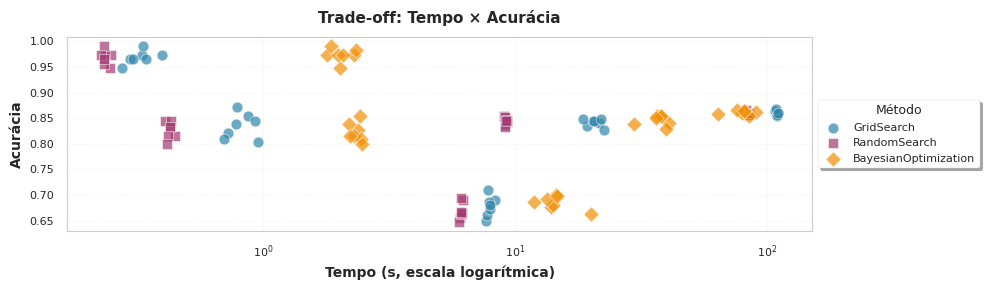

In [38]:
# Trade-off: Tempo vs Acurácia
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(10, 3))

colors = ['#2E86AB', '#A23B72', '#F18F01']
markers = ['o', 's', 'D']

for i, metodo in enumerate(df['metodo'].unique()):
    subset = df[df['metodo'] == metodo]
    ax.scatter(subset['tempo'], subset['acuracia'], 
              label=metodo, s=60, alpha=0.7, 
              color=colors[i], marker=markers[i],
              edgecolors='white', linewidths=0.5)

ax.set_xscale('log')
ax.set_xlabel('Tempo (s, escala logarítmica)', fontsize=10, fontweight='bold')
ax.set_ylabel('Acurácia', fontsize=10, fontweight='bold')
ax.set_title('Trade-off: Tempo × Acurácia', fontsize=11, fontweight='bold', pad=10)
ax.tick_params(labelsize=8)

ax.legend(title='Método', fontsize=8, title_fontsize=9, 
          loc='center left', bbox_to_anchor=(1, 0.5), 
          frameon=True, shadow=True, fancybox=True)
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

plt.tight_layout()
plt.savefig('../graficos/tradeoff_tempo_acuracia.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ Gráfico salvo: ../graficos/tradeoff_tempo_acuracia.png")
plt.show()

✓ Gráfico salvo: ../graficos/tradeoff_tempo_acuracia_por_dataset.png


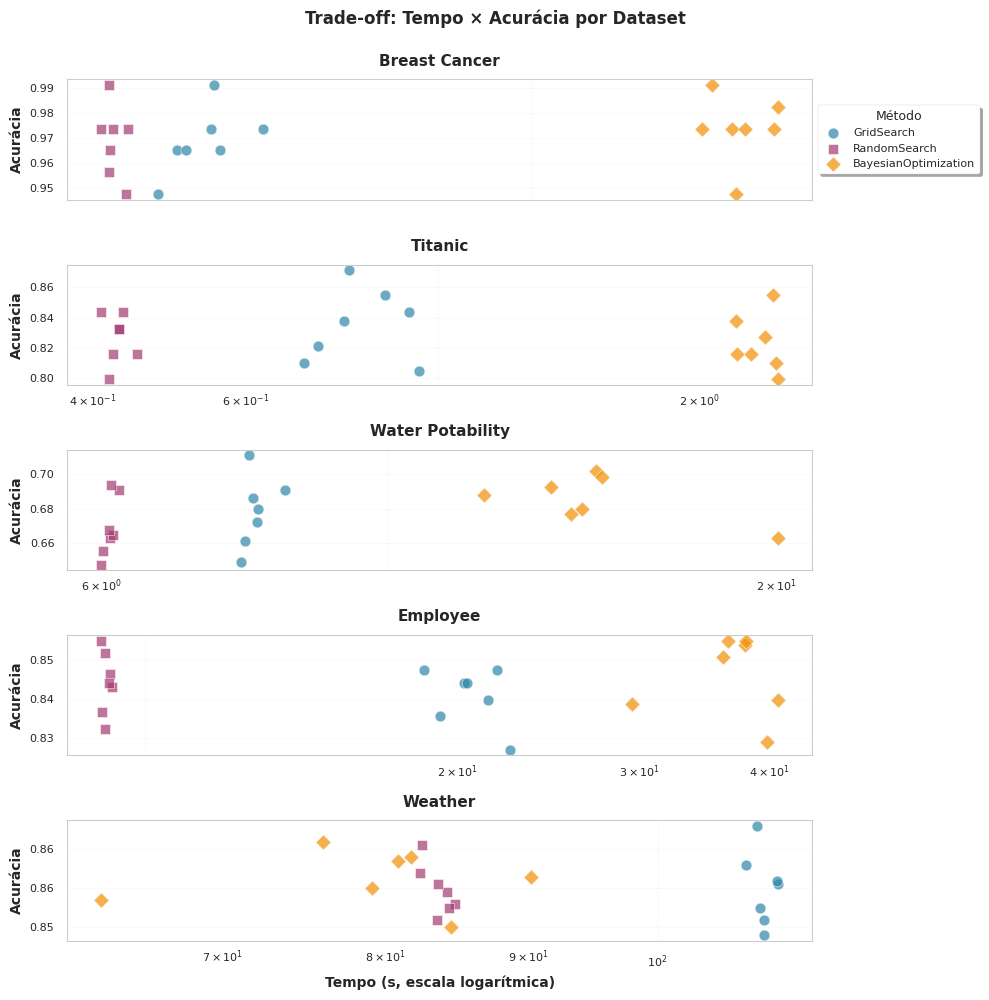

In [40]:
# Trade-off: Tempo vs Acurácia por Dataset
plt.style.use('seaborn-v0_8-paper')

datasets = df['dataset'].unique()
n_datasets = len(datasets)

fig, axes = plt.subplots(n_datasets, 1, figsize=(10, n_datasets * 2))

colors = ['#2E86AB', '#A23B72', '#F18F01']
markers = ['o', 's', 'D']

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    df_dataset = df[df['dataset'] == dataset]
    
    for i, metodo in enumerate(df['metodo'].unique()):
        subset = df_dataset[df_dataset['metodo'] == metodo]
        ax.scatter(subset['tempo'], subset['acuracia'], 
                  label=metodo, s=60, alpha=0.7, 
                  color=colors[i], marker=markers[i],
                  edgecolors='white', linewidths=0.5)
    
    ax.set_xscale('log')
    ax.set_ylabel('Acurácia', fontsize=10, fontweight='bold')
    ax.set_title(f'{dataset}', fontsize=11, fontweight='bold', pad=10)
    ax.tick_params(labelsize=8)
    
    # Legenda apenas no primeiro gráfico
    if idx == 0:
        ax.legend(title='Método', fontsize=8, title_fontsize=9, 
                 loc='center left', bbox_to_anchor=(1, 0.5), 
                 frameon=True, shadow=True, fancybox=True)
    
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))
    
    # Label do eixo X apenas no último gráfico
    if idx == n_datasets - 1:
        ax.set_xlabel('Tempo (s, escala logarítmica)', fontsize=10, fontweight='bold')
    else:
        ax.set_xticklabels([])

plt.suptitle('Trade-off: Tempo × Acurácia por Dataset', 
             fontsize=12, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../graficos/tradeoff_tempo_acuracia_por_dataset.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ Gráfico salvo: ../graficos/tradeoff_tempo_acuracia_por_dataset.png")
plt.show()

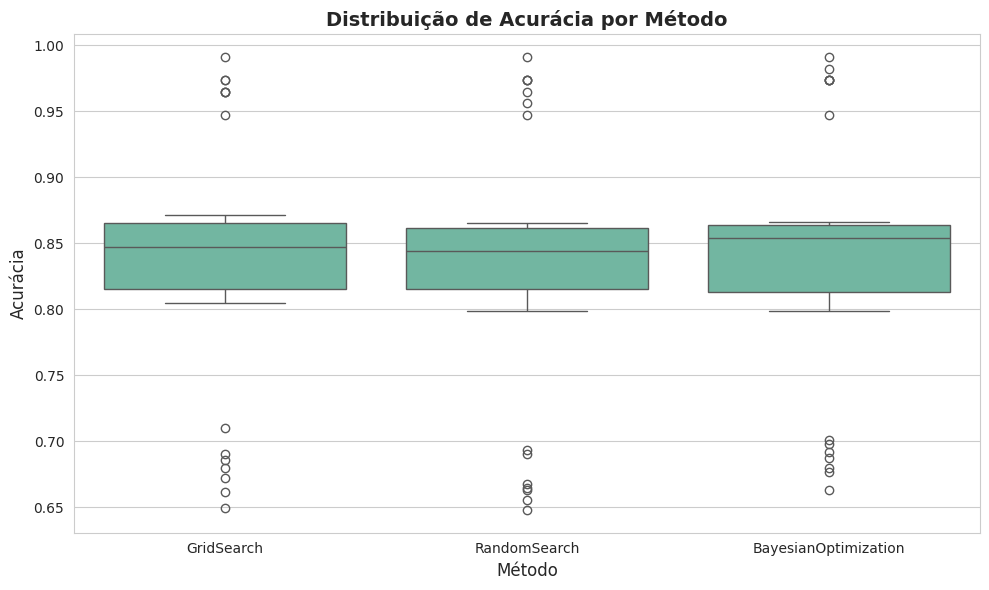

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='acuracia', ax=ax)

ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Acurácia', fontsize=12)
ax.set_title('Distribuição de Acurácia por Método', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

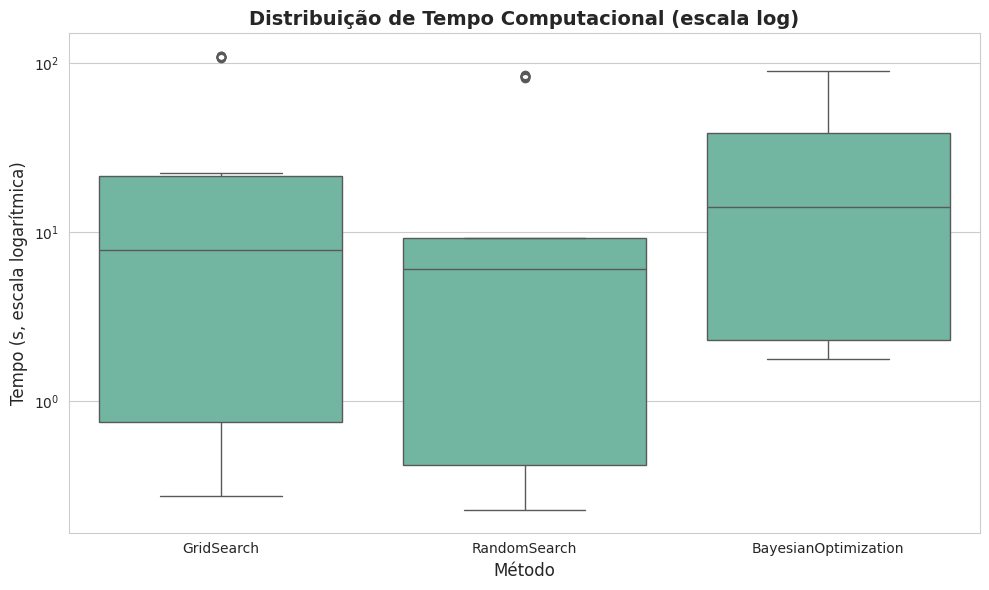

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='tempo', ax=ax)

ax.set_yscale('log')
ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Tempo (s, escala logarítmica)', fontsize=12)
ax.set_title('Distribuição de Tempo Computacional (escala log)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

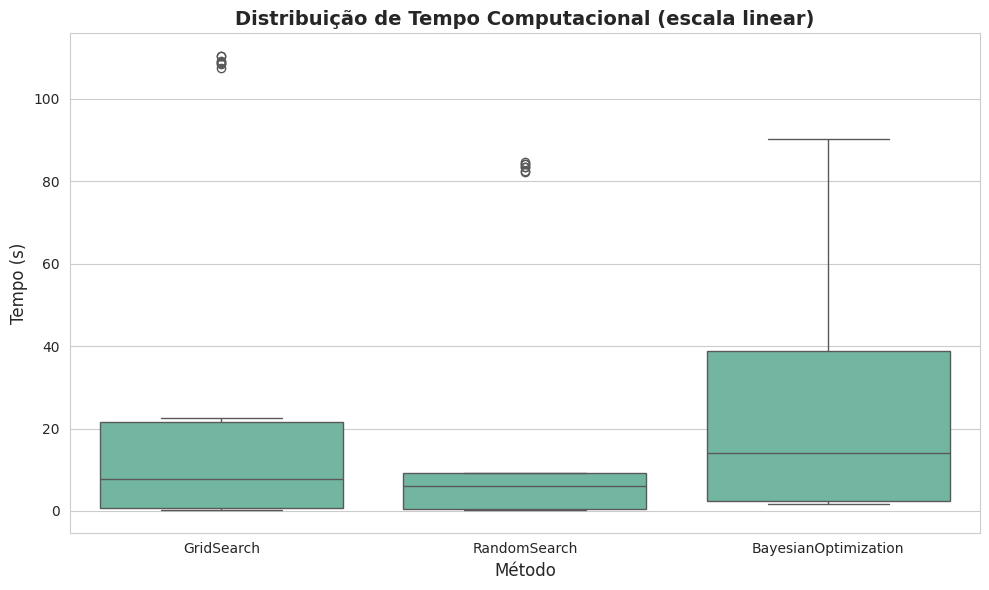

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='metodo', y='tempo', ax=ax)

ax.set_xlabel('Método', fontsize=12)
ax.set_ylabel('Tempo (s)', fontsize=12)
ax.set_title('Distribuição de Tempo Computacional (escala linear)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

✓ Gráfico salvo: ../graficos/interacao_metodo_dataset_acuracia.png


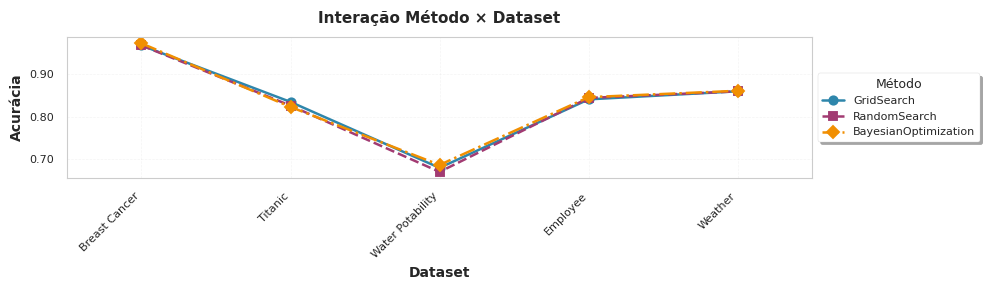

In [25]:
# Gráfico de Interação: Método x Dataset
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(10, 3))

colors = ['#2E86AB', '#A23B72', '#F18F01']
sns.set_palette(colors)

sns.pointplot(data=df, x='dataset', y='acuracia', hue='metodo', errorbar=None,
              markers=['o', 's', 'D'], linestyles=['-', '--', '-.'], 
              markersize=6, linewidth=1.8, ax=ax)

ax.set_xlabel('Dataset', fontsize=10, fontweight='bold')
ax.set_ylabel('Acurácia', fontsize=10, fontweight='bold')
ax.set_title('Interação Método × Dataset', fontsize=11, fontweight='bold', pad=10)
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

ax.legend(title='Método', fontsize=8, title_fontsize=9, 
          loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, shadow=True)
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

plt.tight_layout()
plt.savefig('../graficos/interacao_metodo_dataset_acuracia.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ Gráfico salvo: ../graficos/interacao_metodo_dataset_acuracia.png")
plt.show()

✓ Gráfico salvo: ../graficos/interacao_metodo_dataset_tempo.png


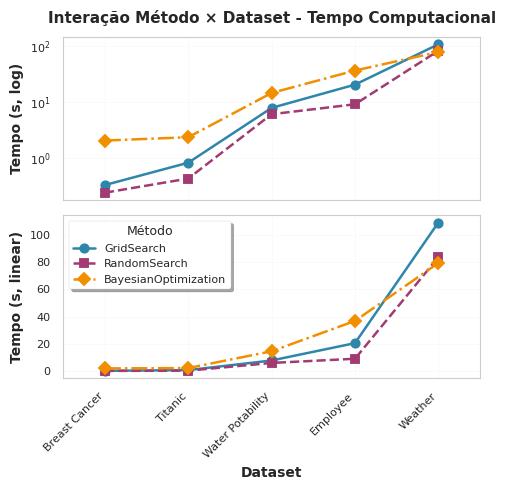

In [36]:
# Gráfico de Interação: Método x Dataset (Tempo - Log e Linear)
plt.style.use('seaborn-v0_8-paper')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

colors = ['#2E86AB', '#A23B72', '#F18F01']
sns.set_palette(colors)

# Gráfico 1: Escala Logarítmica
sns.pointplot(data=df, x='dataset', y='tempo', hue='metodo', errorbar=None,
              markers=['o', 's', 'D'], linestyles=['-', '--', '-.'], 
              markersize=6, linewidth=1.8, ax=ax1)

ax1.set_yscale('log')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.set_ylabel('Tempo (s, log)', fontsize=10, fontweight='bold')
ax1.set_title('Interação Método × Dataset - Tempo Computacional', fontsize=11, fontweight='bold', pad=10)
ax1.tick_params(axis='y', labelsize=8)

ax1.get_legend().remove()  # Remove a legenda do gráfico superior
ax1.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Gráfico 2: Escala Linear
sns.pointplot(data=df, x='dataset', y='tempo', hue='metodo', errorbar=None,
              markers=['o', 's', 'D'], linestyles=['-', '--', '-.'], 
              markersize=6, linewidth=1.8, ax=ax2)

ax2.set_xlabel('Dataset', fontsize=10, fontweight='bold')
ax2.set_ylabel('Tempo (s, linear)', fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')

ax2.legend(title='Método', fontsize=8, title_fontsize=9, 
          loc='upper left', frameon=True, shadow=True, fancybox=True)
ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax2.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../graficos/interacao_metodo_dataset_tempo.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ Gráfico salvo: ../graficos/interacao_metodo_dataset_tempo.png")
plt.show()

✓ QQ-Plot salvo: ../graficos/qqplot_acuracia.png


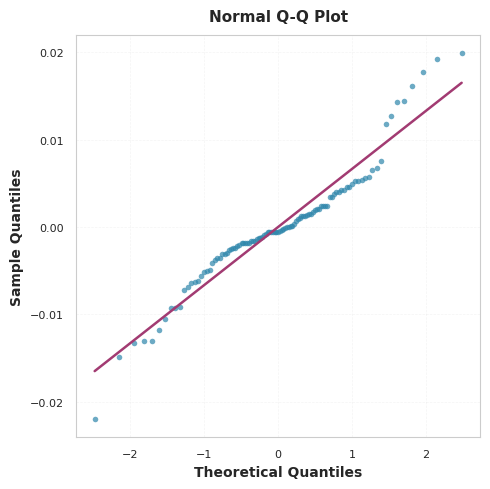

In [29]:
# QQ-Plot dos Resíduos - Modelo RCBD (Acurácia)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Criar coluna 'bloco' (dataset_seed)
df['bloco'] = df['dataset'] + '_' + df['seed'].astype(str)

# Ajustar modelo RCBD: acuracia ~ metodo + bloco
modelo = ols('acuracia ~ C(metodo) + C(bloco)', data=df).fit()

# Extrair resíduos
residuos = modelo.resid

# Configurar figura
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(5, 5))

# Gerar QQ-Plot
stats.probplot(residuos, dist="norm", plot=ax)

# Estilização
ax.set_title('Normal Q-Q Plot', fontsize=11, fontweight='bold', pad=10)
ax.set_xlabel('Theoretical Quantiles', fontsize=10, fontweight='bold')
ax.set_ylabel('Sample Quantiles', fontsize=10, fontweight='bold')
ax.tick_params(labelsize=8)
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Ajustar cor da linha de referência
line = ax.get_lines()[1]  # Linha de referência
line.set_color('#A23B72')
line.set_linewidth(1.8)

# Ajustar cor dos pontos
points = ax.get_lines()[0]
points.set_markerfacecolor('#2E86AB')
points.set_markeredgecolor('#2E86AB')
points.set_markersize(4)
points.set_alpha(0.7)

plt.tight_layout()
plt.savefig('../graficos/qqplot_acuracia.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ QQ-Plot salvo: ../graficos/qqplot_acuracia.png")
plt.show()

✓ QQ-Plot salvo: ../graficos/qqplot_tempo.png


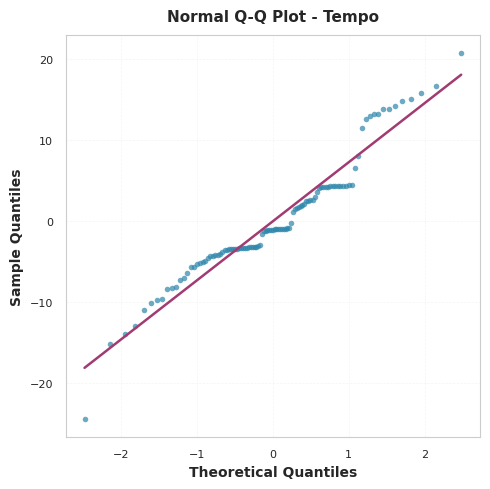

In [37]:
# QQ-Plot dos Resíduos - Modelo RCBD (Tempo)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Ajustar modelo RCBD: tempo ~ metodo + bloco
modelo_tempo = ols('tempo ~ C(metodo) + C(bloco)', data=df).fit()

# Extrair resíduos
residuos_tempo = modelo_tempo.resid

# Configurar figura
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(5, 5))

# Gerar QQ-Plot
stats.probplot(residuos_tempo, dist="norm", plot=ax)

# Estilização
ax.set_title('Normal Q-Q Plot - Tempo', fontsize=11, fontweight='bold', pad=10)
ax.set_xlabel('Theoretical Quantiles', fontsize=10, fontweight='bold')
ax.set_ylabel('Sample Quantiles', fontsize=10, fontweight='bold')
ax.tick_params(labelsize=8)
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Ajustar cor da linha de referência
line = ax.get_lines()[1]  # Linha de referência
line.set_color('#A23B72')
line.set_linewidth(1.8)

# Ajustar cor dos pontos
points = ax.get_lines()[0]
points.set_markerfacecolor('#2E86AB')
points.set_markeredgecolor('#2E86AB')
points.set_markersize(4)
points.set_alpha(0.7)

plt.tight_layout()
plt.savefig('../graficos/qqplot_tempo.png', dpi=300, 
            bbox_inches='tight', transparent=True)
print("✓ QQ-Plot salvo: ../graficos/qqplot_tempo.png")
plt.show()

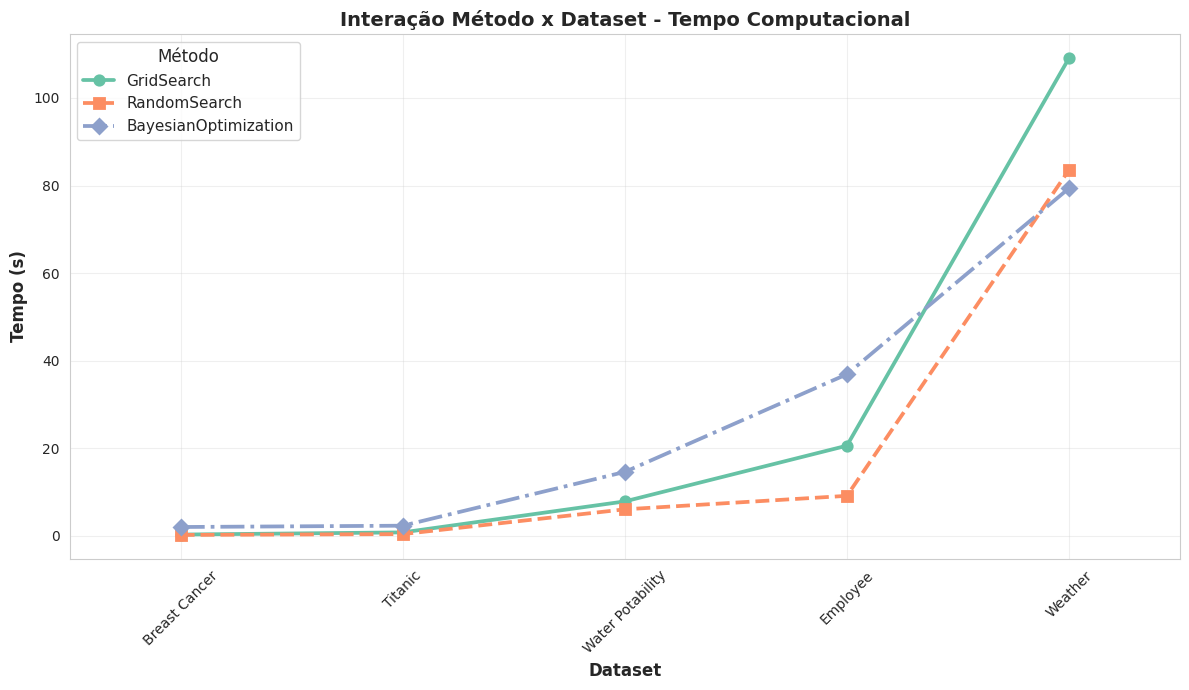

In [14]:
# Gráfico de Interação: Método x Dataset (Tempo)
fig, ax = plt.subplots(figsize=(12, 7))

sns.pointplot(
    data=df, 
    x='dataset', 
    y='tempo', 
    hue='metodo',
    errorbar=None,  # Remove barras de erro
    markers=['o', 's', 'D'],  # Marcadores distintos: círculo, quadrado, diamante
    linestyles=['-', '--', '-.'],  # Estilos de linha distintos
    ax=ax
)

# Configurações de estilo e layout
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Tempo (s)', fontsize=12, fontweight='bold')
ax.set_title('Interação Método x Dataset - Tempo Computacional', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Método', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

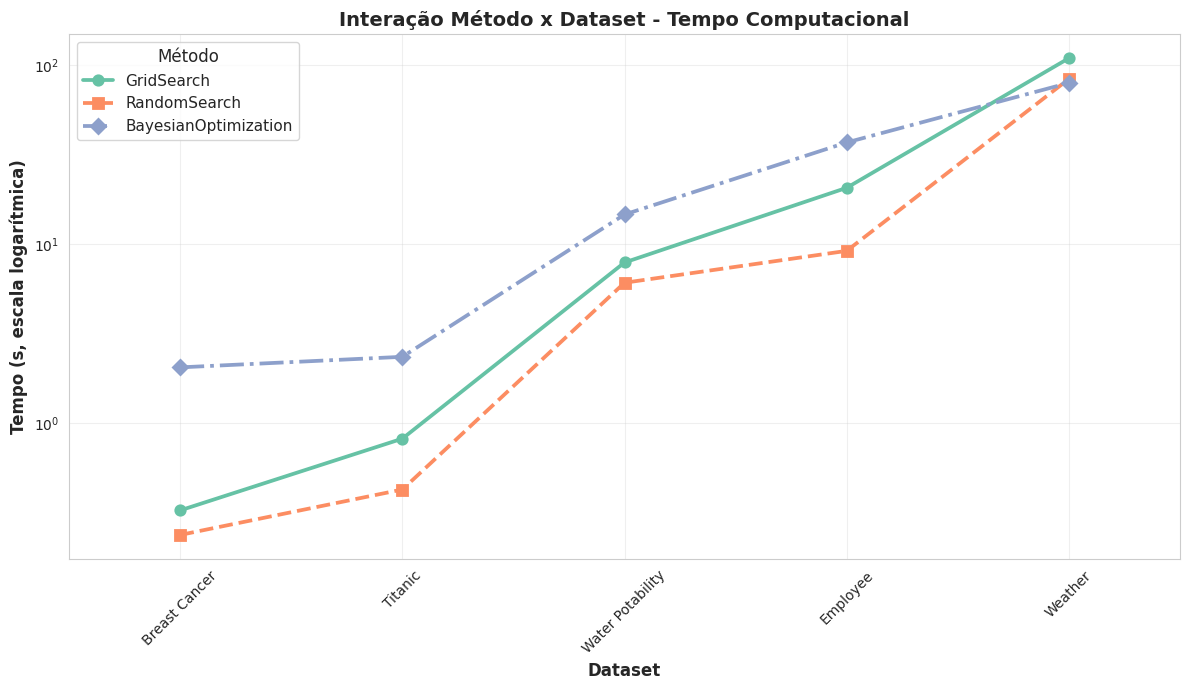

In [16]:
# Gráfico de Interação: Método x Dataset (Tempo - escala log)
fig, ax = plt.subplots(figsize=(12, 7))

sns.pointplot(
    data=df, 
    x='dataset', 
    y='tempo', 
    hue='metodo',
    errorbar=None,
    markers=['o', 's', 'D'],
    linestyles=['-', '--', '-.'],
    ax=ax
)

ax.set_yscale('log')  # Escala logarítmica
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Tempo (s, escala logarítmica)', fontsize=12, fontweight='bold')
ax.set_title('Interação Método x Dataset - Tempo Computacional', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Método', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\n=== RESUMO EXECUTIVO ===")
print(f"\nMelhor Acurácia Geral: {df['acuracia'].max():.4f}")
best_acc_row = df[df['acuracia'] == df['acuracia'].max()].iloc[0]
print(f"  Dataset: {best_acc_row['dataset']}, Método: {best_acc_row['metodo']}, Seed: {best_acc_row['seed']}")

print(f"\nMétodo Mais Rápido (tempo médio):")
fastest = df.groupby('metodo')['tempo'].mean().idxmin()
print(f"  {fastest}: {df.groupby('metodo')['tempo'].mean()[fastest]:.3f}s")

print(f"\nMétodo com Melhor Acurácia Média:")
best_method = df.groupby('metodo')['acuracia'].mean().idxmax()
print(f"  {best_method}: {df.groupby('metodo')['acuracia'].mean()[best_method]:.4f}")

print(f"\nRanking por Acurácia Média:")
ranking = df.groupby('metodo')['acuracia'].mean().sort_values(ascending=False)
for i, (metodo, acc) in enumerate(ranking.items(), 1):
    print(f"  {i}. {metodo}: {acc:.4f}")


=== RESUMO EXECUTIVO ===

Melhor Acurácia Geral: 0.9912
  Dataset: Breast Cancer, Método: GridSearch, Seed: 3

Método Mais Rápido (tempo médio):
  RandomSearch: 19.894s

Método com Melhor Acurácia Média:
  BayesianOptimization: 0.8379

Ranking por Acurácia Média:
  1. BayesianOptimization: 0.8379
  2. GridSearch: 0.8366
  3. RandomSearch: 0.8336
